## Kaggle : Job to predict if a passenger survived the sinking of the Titanic or not.

# pandas is a library use for data   analysis and data manipulation.
# matplotlib is use for data visualization

In [175]:
import pandas as pd
from matplotlib import pyplot as plt

In [176]:
titanic_train=pd.read_csv('titanic_train.csv')
titanic_test=pd.read_csv('titanic_test.csv')

In [177]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
titanic_train.shape

(891, 12)

In [179]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

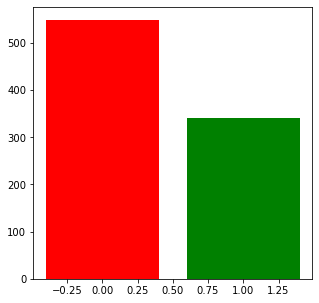

In [180]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()), list(titanic_train['Survived'].value_counts()), color=["r",'g'])
plt.show()

In [181]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

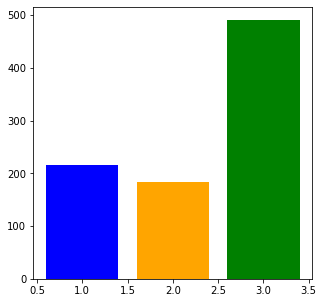

In [182]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()), list(titanic_train['Pclass'].value_counts()), color=["green","blue","orange"])
plt.show()

In [183]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

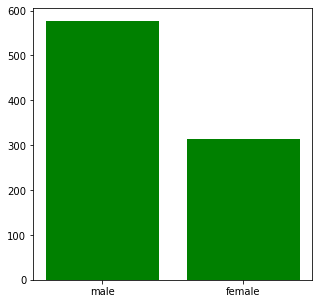

In [184]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()), list(titanic_train['Sex'].value_counts()), color=["g",'g'])
plt.show()

# Bar plot is use when we work with categoary data
# while histogram is use when we work with numerical data
# As age is numerical data so we use histogram to analyze the data

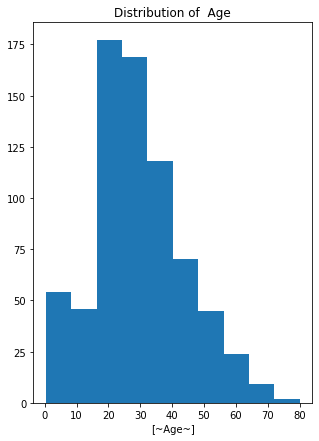

In [185]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title("Distribution of  Age")
plt.xlabel("[~Age~]")
plt.show()

# we cannot build dataset on null value

In [186]:
titanic_train['Survived'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

# my independent variable is Pclass col. and dependent col. is Survived col.
# we need to find how many folks survive in the titanic ship by building model on train set and check it by testing on top of  test data set

In [187]:
sum(titanic_train['Survived'].isnull())

0

In [188]:
 titanic_train['Pclass'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Pclass, Length: 891, dtype: bool

In [189]:
sum(titanic_train['Pclass'].isnull())

0

# As Age column has lots of Null value so we cannot use it for building model 

In [190]:
titanic_train['Survived'].corr(titanic_train['Age'])

-0.07722109457217764

In [191]:
titanic_train['Survived'].corr(titanic_train['Pclass'])

-0.33848103596101475

In [192]:
# correlation table between survived and rest all the columns
titanic_train.corr().Survived

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

## correlation significance :
–1. A perfect negative (downward sloping) linear relationship
–0.70. A strong negative (downward sloping) linear relationship
–0.50. A moderate negative (downhill sloping) relationship
–0.30. A weak negative (downhill sloping) linear relationship
0. No linear relationship
+0.30. A weak positive (upward sloping) linear relationship
+0.50. A moderate positive (upward sloping) linear relationship
+0.70. A strong positive (upward sloping) linear relationship
+1. A perfect positive (upward sloping) linear relationship

# We will use Pclass column to build the model as its correaltion is higher than other column to get an accurate model

In [48]:
#Building Mode

## Building Model
# check if null value is present or not

In [193]:
sum(titanic_train['Pclass'].isnull())

0

In [194]:
sum(titanic_train['Survived'].isnull())

0

## Extract Independent and dependent variable

In [195]:
x_train=titanic_train[['Pclass']]
y_train=titanic_train[['Survived']]

## storing the column in x_trian object
## similarly storing the survived column in y_trian object

# Build a classification model
# Here we will use Decision tree Classifier to  build the model
# It is present in tree library so to use this we need to import sklearn

In [196]:
from sklearn.tree import DecisionTreeClassifier

In [197]:
#make object or instance of DecisionTreeClassifier
dtc=DecisionTreeClassifier() 

In [198]:
#fit or build the model on top of training dataset
# out training set comprises of independent and dependent variable
#with the dtc we have built the model on top of training set
dtc=dtc.fit( x_train , y_train )

In [199]:
dtc

DecisionTreeClassifier()

In [200]:
#predicting values

In [201]:
#build the model on top of test set

In [202]:
#check null value in Pclass col for titanic_test dataset
#find out the y_test?

In [203]:
 titanic_test['Pclass'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Pclass, Length: 418, dtype: bool

In [204]:
sum( titanic_test['Pclass'].isnull())

0

In [205]:
#store it in same titanic_test dataset

In [206]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [207]:
titanic_test.shape

(418, 11)

In [208]:
#Extract the Pclass column from the titanic_test set and store it in the object x_test

In [209]:
x_test= titanic_test[['Pclass']]

In [210]:
# predic the value on top of titanic_test

In [211]:
y_pred = dtc.predict(x_test)

In [212]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

# In the above y_ped object  or numpy.ndarray we  have got values that   tells who will survive and wont survive.
# 1- represent : passenger gonna survive
# 0-represent : passeneger not gonna survive

In [213]:
#create a dataframe which should contains passenger id and survived column

In [214]:
output= pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': y_pred})

In [215]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [217]:
output.to_csv('my_solution.csv', index=False)

In [236]:
#Accuracy of the model is around 70%

# Thanks